<a href="https://colab.research.google.com/github/AhmedB479/Monte-Carlo-On-PSX/blob/main/Monte_Carlo_Sim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
pip install psx-data-reader

In [62]:
import psx
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
from scipy.stats import norm

https://www.investing.com/indices/karachi-100-historical-data

In [63]:
data = pd.DataFrame()
ticker = 'ILP'

In [64]:
# #for index
# kse100 = pd.read_csv('Karachi 100 Historical Data.csv')
# kse100

In [65]:
all_tickers = psx.tickers()
all_tickers[all_tickers['symbol'] == ticker]
if ticker not in all_tickers['symbol']:
  data = psx.stocks(ticker, start=datetime.date(2019, 4, 5), end=datetime.date.today())
else:
  print("Ticker not found")

/usr/local/lib/python3.10/dist-packages/psx/web.py:100: FutureWarning:

The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.



In [66]:
test = data
test.insert(0,"index",range(0,len(data)),True)
test.insert(1,"date",data.index.date,True)
test.set_index("index",drop=True,inplace=True)
test['date'] = pd.to_datetime(test['date'])

In [67]:
test.to_csv(f"{ticker}.csv",index=True)

In [68]:
df = pd.read_csv(f"{ticker}.csv")

In [69]:
df

,index,date,Open,High,Low,Close,Volume
0,0,2019-04-05,48.00,48.20,45.75,46.15,14321500.0
1,1,2019-04-08,45.74,46.00,43.85,45.09,1364000.0
2,2,2019-04-09,45.21,46.20,44.00,45.24,674500.0
3,3,2019-04-10,45.35,45.67,42.98,43.11,252500.0
4,4,2019-04-11,41.75,45.23,41.75,44.78,460000.0
...,...,...,...,...,...,...,...
1339,1339,2024-09-10,69.94,72.25,68.00,71.31,580836.0
1340,1340,2024-09-11,70.05,71.45,70.00,70.17,105469.0
1341,1341,2024-09-12,70.17,71.45,70.00,71.00,226113.0
1342,1342,2024-09-13,71.85,76.89,64.01,72.46,2165804.0


In [70]:
# fig = go.Figure(data=[go.Candlestick(
#     x=kse100['Date'],
#     open=kse100['Open'],
#     high=kse100['High'],
#     low=kse100['Low'],
#     close=kse100['Low'],
#     name='Candlestick'
# )])

# fig.update_layout(
#     title="KSE100 index",
#     xaxis_title="Date",
#     yaxis_title="Points",
#     yaxis2=dict(title='Volume',
#                 overlaying='y',
#                 side='right'),
#     legend=dict(x=0,y=1)
# )
# fig.show()

In [71]:
fig = go.Figure(data=[go.Candlestick(
    x=df['date'],
    open=df['Open'],
    high=df['High'],
    low=df['Low'],
    close=df['Close'],
    name='Candlestick'
)])
fig.add_trace(go.Bar(
    x=df['date'],
    y=df['Volume'],
    name='Volume',
    marker_color='rgba(0, 0, 255, 0.5)',
    yaxis='y2'
))
fig.update_layout(
    title="Interloop stocks",
    xaxis_title="Date",
    yaxis_title="Price(PKR)",
    yaxis2=dict(title='Volume',
                overlaying='y',
                side='right'),
    legend=dict(x=0,y=1)
)
fig.show()

# Basic Monte Carlo Sim

Text(0, 0.5, 'Frequency')

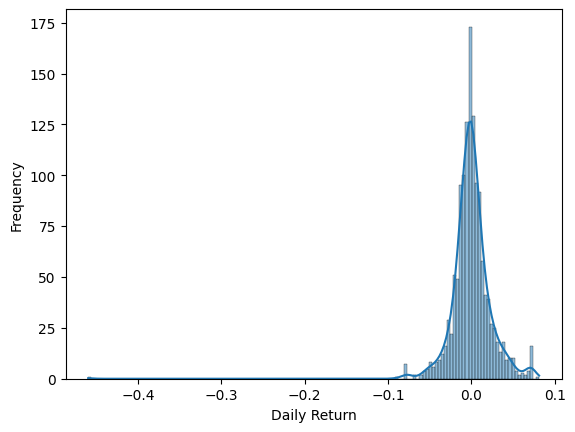

In [72]:
#Log returns
log_return = np.log(1+df['Close'].pct_change())

sns.histplot(log_return.iloc[1:],kde=True)
plt.xlabel("Daily Return")
plt.ylabel("Frequency")

In [73]:
# Compute the Drift
u = log_return.mean()
var = log_return.var()
drift = u - (0.5*var)

In [74]:
#variance and daily returns
stdev = log_return.std()
days = 50
trails = 10000
z = norm.ppf(np.random.rand(days,trails))
daily_returns = np.exp(drift + stdev * z)

In [75]:
price_paths = np.zeros_like(daily_returns)
price_paths[0] = df['Close'].iloc[-1]
for t in range(1,days):
  price_paths[t] = price_paths[t-1]*daily_returns[t]

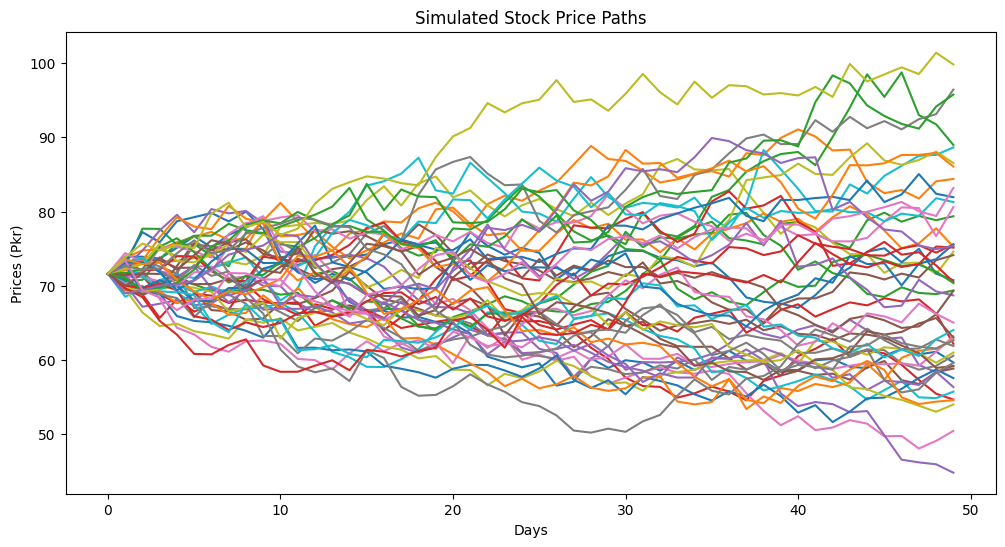

In [76]:
plt.figure(figsize=(12,6))
for i in range(1,days):
  plt.plot(price_paths[:,i],lw=1.5)

plt.title('Simulated Stock Price Paths')
plt.xlabel('Days')
plt.ylabel('Prices (Pkr)')
plt.show()

In [81]:
import plotly.graph_objects as go

# Assuming price_paths is already defined and days is the number of days

# Create a figure
fig = go.Figure()

# Add lines for each price path
for i in range(1, days):
    fig.add_trace(go.Scatter(
        x=np.arange(price_paths.shape[0]),  # Assuming days are represented by index of rows
        y=price_paths[:, i],
        mode='lines',
        line=dict(width=1.5),
        name=f'Path {i}'
    ))

# Update layout with titles and labels
fig.update_layout(
    title='Simulated Stock Price Paths',
    xaxis_title='Days',
    yaxis_title='Prices (Pkr)',
    showlegend=True
)

# Display the plot
fig.show()


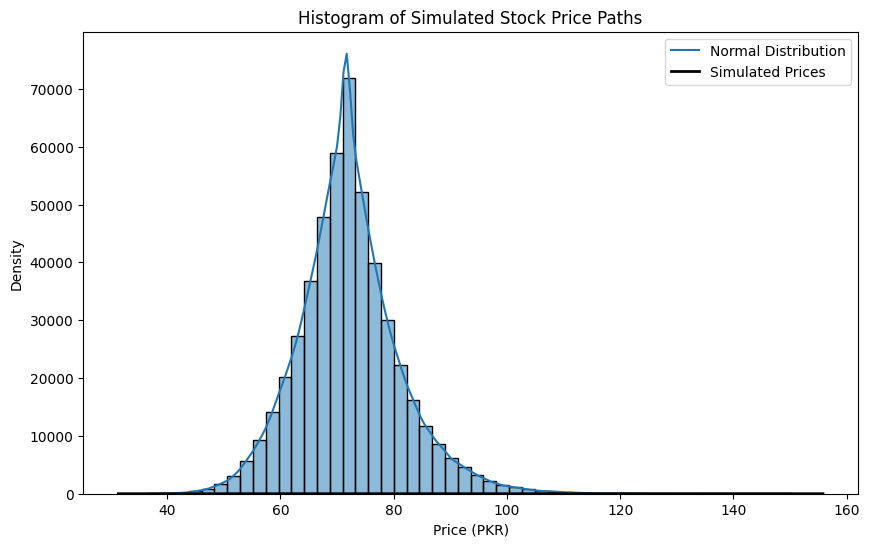

In [78]:
price_paths_flat = price_paths.flatten()
plt.figure(figsize=(10,6))
sns.histplot(price_paths_flat,bins=50,kde=True)

xmin,xmax = plt.xlim()
x = np.linspace(xmin,xmax,10)
p = norm.pdf(x,price_paths_flat.mean(),price_paths_flat.std())
plt.plot(x,p,'k',linewidth=2)

plt.title('Histogram of Simulated Stock Price Paths')
plt.xlabel('Price (PKR)')
plt.ylabel('Density')
plt.legend(['Normal Distribution', 'Simulated Prices'])
plt.show()

In [80]:
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.stats import norm

price_paths_flat = price_paths.flatten()

hist_values, bin_edges = np.histogram(price_paths_flat, bins=50)

fig = make_subplots()

fig.add_trace(go.Bar(
    x=(bin_edges[:-1] + bin_edges[1:]) / 2,  # Midpoints of bins
    y=hist_values,
    name='Simulated Prices',
    marker_color='blue',
    opacity=0.7
))

xmin, xmax = min(bin_edges), max(bin_edges)
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, price_paths_flat.mean(), price_paths_flat.std())

fig.add_trace(go.Scatter(
    x=x,
    y=p * len(price_paths_flat) * (bin_edges[1] - bin_edges[0]),  # Scale to match the histogram
    mode='lines',
    name='Normal Distribution',
    line=dict(color='black', width=2)
))

num_labels = 10  # Number of labels
tick_vals = np.linspace(xmin, xmax, num_labels)  # Create ticks
tick_text = [f'{val:.2f}' for val in tick_vals]  # Format the ticks

fig.update_layout(
    title='Histogram of Simulated Stock Price Paths',
    xaxis_title='Price (PKR)',
    yaxis_title='Density',
    xaxis=dict(
        tickvals=tick_vals,
        ticktext=tick_text
    ),
    showlegend=True
)
fig.show()
